# Linear Regression Salary by Years of Experiences 

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [135]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [136]:
df.shape

(30, 2)

In [137]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [139]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [140]:
    for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column YearsExperience outliers = 0.00%
Column Salary outliers = 0.00%


In [141]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [142]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

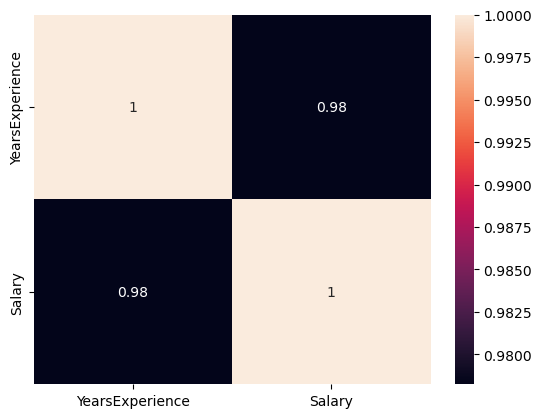

In [143]:
sns.heatmap(data=df.corr(),annot=True)

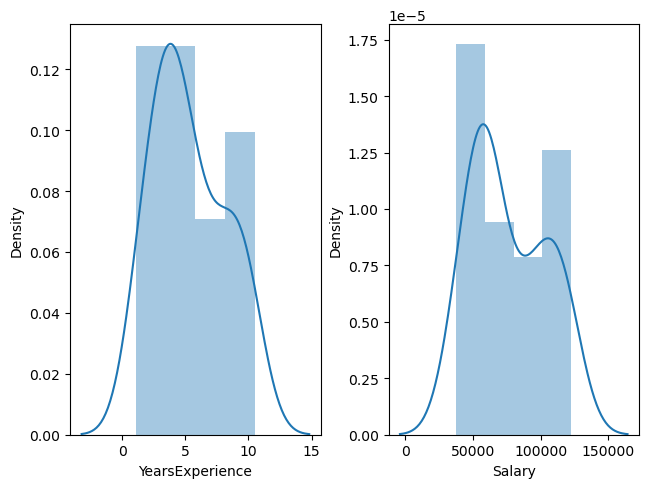

In [144]:
fig, axs = plt.subplots(ncols=2, nrows=1)
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

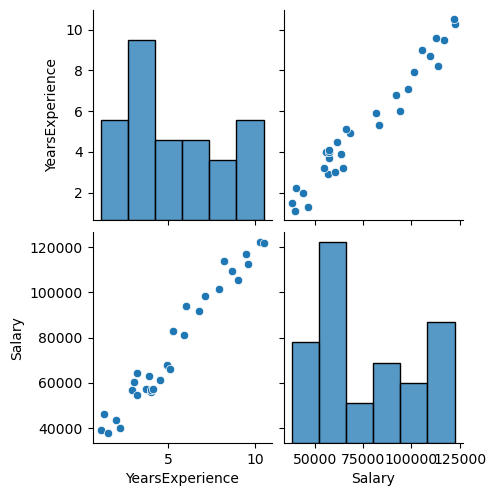

In [145]:
sns.pairplot(df)

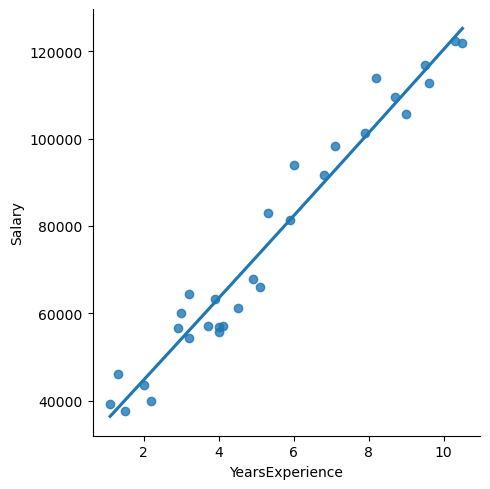

In [146]:
sns.lmplot(x='YearsExperience', y='Salary',data=df,order=2,ci=None)

In [147]:
x =np.array(df['YearsExperience']).reshape(-1,1)
y =np.array(df['Salary']).reshape(-1,1)

In [148]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.30)
reg = LinearRegression()
reg.fit(x_train,y_train)
print(y_train.flatten())

[ 93940  81363  83088 116969  56642  57081  39343  98273 113812  55794
 109431  57189 112635  64445 101302  66029  63218  54445  39891  67938
 121872]


In [149]:
reg.intercept_

array([24648.40962547])

In [150]:
reg.coef_

array([[9718.66152021]])

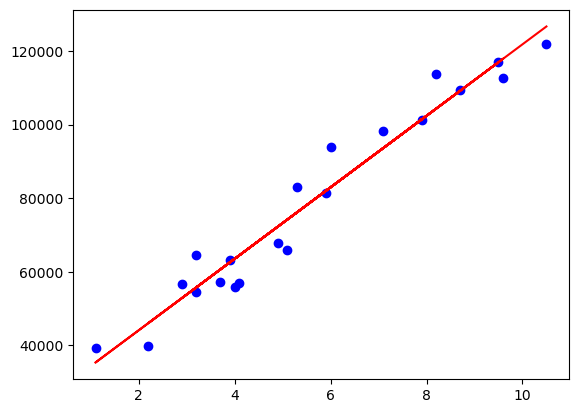

In [151]:
y_predict= reg.predict(x_train)
plt.scatter(x_train,y_train,color='b')
plt.plot(x_train,y_predict,color='r')
plt.show()

In [152]:
print(reg.score(x_test,y_test))

0.9624865713263218


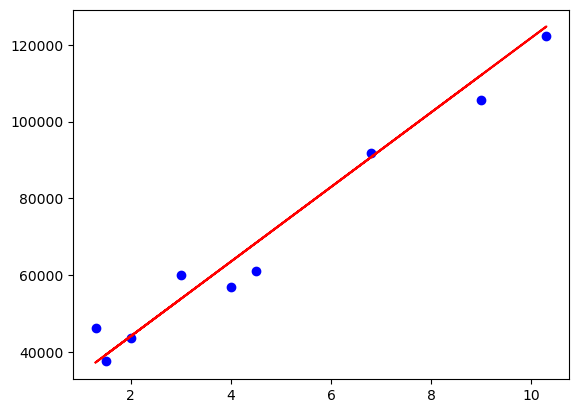

In [153]:
y_predict= reg.predict(x_test)
plt.scatter(x_test,y_test,color='b')
plt.plot(x_test,y_predict,color='r')
plt.show()

In [154]:
R2=metrics.r2_score(y_test,y_predict)
R2

0.9624865713263218

In [155]:
print(metrics.mean_absolute_error(y_test,y_predict))

4562.02128719395


In [156]:
print(metrics.mean_squared_error(y_test,y_predict))

29742511.860138074


In [157]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

5453.669577462323


In [158]:
print(reg.predict([[5]])) 

[[73241.71722654]]


**Linear Regression Assumptions**

In [159]:
error= y_test-y_predict
error

array([[-6534.3633074 ],
       [-7271.38646644],
       [-1495.4019058 ],
       [ -560.7326659 ],
       [-6566.05570633],
       [ 1002.69203707],
       [-2359.62328368],
       [ 8922.33039825],
       [ 6345.60581388]])

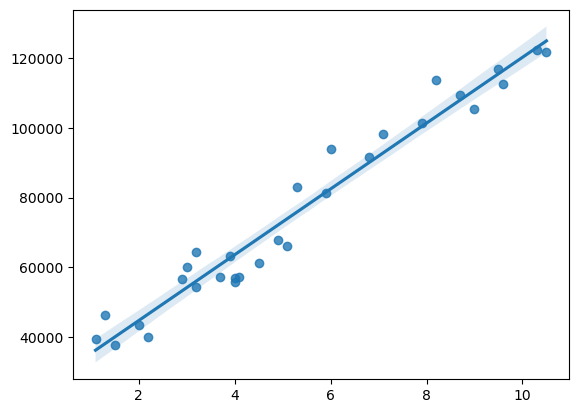

In [160]:
#Linearity
sns.regplot(x=x,y=y)
plt.show()

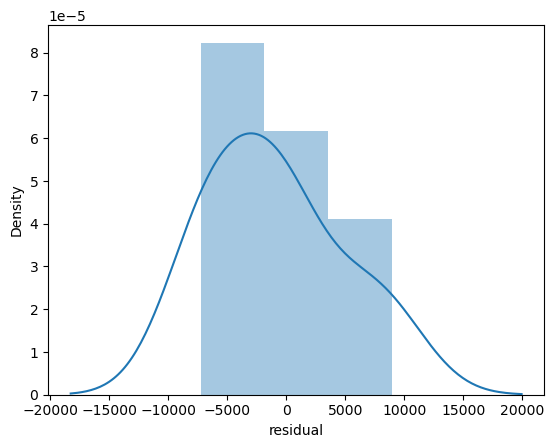

In [161]:
#Normality
sns.distplot(error)
plt.xlabel('residual')
plt.show()

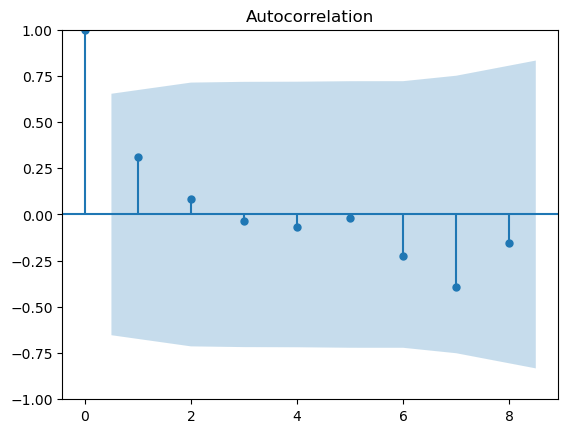

In [162]:
#No Autocorrelation
acf=plot_acf(error)
plt.show()

<class 'numpy.ndarray'>


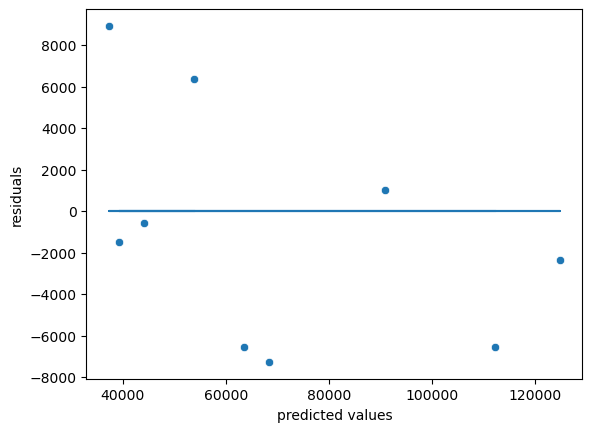

In [163]:
#Homoscedasticity
print(type(error))
sns.scatterplot(x=y_predict.flatten(),y=error.flatten())
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.plot(y_predict, [0]*len(y_predict))
plt.show()

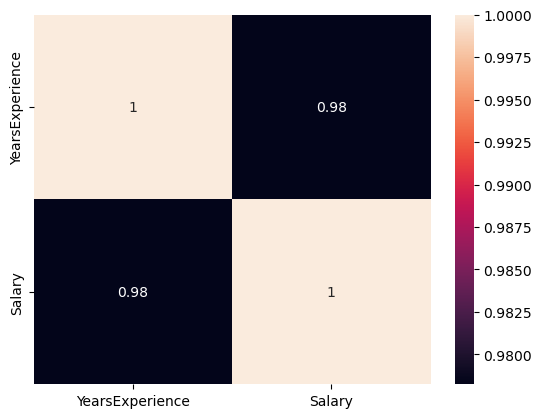

In [164]:
#Multicollinearity
sns.heatmap(df.corr(),annot=True)
plt.show()